In [1]:
%load_ext autoreload
%autoreload 0

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from components import *
%matplotlib widget
from matplotlib.patches import Polygon
plt.rcParams['figure.figsize'] = (6,3)
from scipy.spatial import ConvexHull
from geometry_elements import Ray3D
grating = Grating.grating_from_file('config_pgm.ini')
mirror = Plane_Mirror.mirror_from_file('config_pgm.ini')
pgm = PGM(grating=grating, mirror=mirror)
pgm.mirror.theta = pgm.theta
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.lines import Line2D
from geometry_elements import Point3D, Vector3D

line_density
1100
energy
80
cff
2.25
order
1
voffset
20
hoffset
0
axis_voffset
10
axis_hoffset
0
theta
30


In [13]:
pgm.set_theta()

In [7]:
pgm.beam_offset=-20

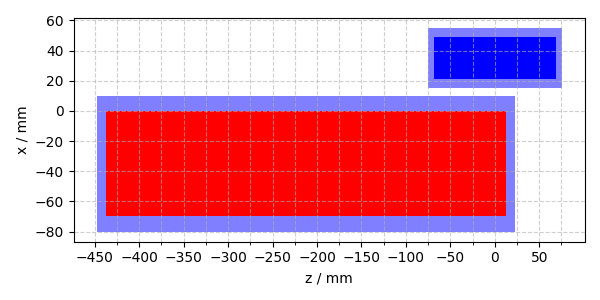

In [14]:
fig,ax = plt.subplots()
pgm.mirror.borders=np.array([10,10,10,10])
pgm.grating.borders=np.array([6,6,6,6])
ax.set_xticks(np.arange(-500,100,50))
ax.set_xticks(np.arange(-500,100,25),minor=True)
pgm.draw_topview(ax)
ax.set_xlabel('z / mm')
ax.set_ylabel('x / mm')
plt.tight_layout()
ax.grid(which='both',linestyle='--',alpha=0.6)


In [15]:

pgm.mirror.axis_voffset = 10
pgm.beam_height = 5
pgm.beam_width = 5
pgm.beam_offset = -20
pgm.grating.compute_angles()
pgm.mirror.compute_corners()
pgm.grating.compute_corners()
pgm.generate_rays()
grating_ray, mirror_int, grating_int = pgm.propagate(pgm.rays)

In [16]:
grating_ray[0].position

Vector3D(x=0.0, y=0.00028042481046952616, z=0.0013401249735238707)

In [17]:
mirror_int[0].z

-148.82690255051762

In [18]:
r0_1_z = np.array([
pgm.rays[0].position.z,
mirror_int[0].z,
grating_int[0].z,
1000*grating_ray[0].vector[-1]
])

r0_1_x = np.array([
pgm.rays[0].position.y,
mirror_int[0].y,
grating_int[0].y,
1000*grating_ray[0].vector[-2]
])



In [19]:
1000*grating_ray[0].vector

array([ 0.00000000e+00, -2.88717548e-14,  1.00000000e+03])

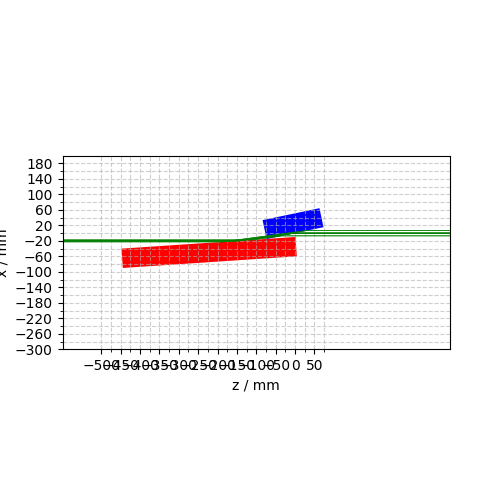

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
pgm.draw_sideview(ax)
ax.set_xlim(-600,400)
ax.set_ylim(-300,200)
ax.set_xlabel('z / mm')
ax.set_ylabel('x / mm')
ax.set_xticks(np.arange(-500,100,50))
ax.set_xticks(np.arange(-500,100,25),minor=True)
ax.set_yticks(np.arange(-300,200,40))
ax.set_yticks(np.arange(-300,200,20),minor=True)
for index, ray in enumerate(grating_ray):
    r_z = np.array([
    pgm.rays[index].position.z,
    mirror_int[index].z,
    grating_int[index].z,
    grating_int[index].z + 1000*grating_ray[index].vector[-1]
    ])

    r_x = np.array([
    pgm.rays[index].position.y,
    mirror_int[index].y,
    grating_int[index].y,
    grating_int[index].y + 1000*grating_ray[index].vector[-2]
    ])

    line = Line2D(r_z, r_x, color='green', linewidth=0.5)
    ax.add_line(line)
ax.set_aspect('equal',adjustable='box')
ax.grid(which='both',linestyle='--',alpha=0.6)


In [77]:
pgm.grating.beta

-84.89575287949717

In [5]:
a = np.array([
    [1,2],
    [1,2],
    [1,2]
])

In [6]:
type(pgm.rays[0])

geometry_elements.Ray3D

In [7]:
import geometry_elements

In [4]:
pgm.rays

[Ray3D(position=Point3D(x=0.0, y=0.0, z=-1000.0), vector=[0. 0. 1.]),
 Ray3D(position=Point3D(x=0.0, y=2.5, z=-1000.0), vector=[0. 0. 1.]),
 Ray3D(position=Point3D(x=0.0, y=-2.5, z=-1000.0), vector=[0. 0. 1.]),
 Ray3D(position=Point3D(x=-2.5, y=0.0, z=-1000.0), vector=[0. 0. 1.]),
 Ray3D(position=Point3D(x=2.5, y=0.0, z=-1000.0), vector=[0. 0. 1.])]

In [5]:
grating_ray, mirror_int, grating_int = pgm.propagate(pgm.rays)

0

In [6]:
mirror_int[0]

Vector3D(x=0.0, y=0.0, z=299.6583203752821)

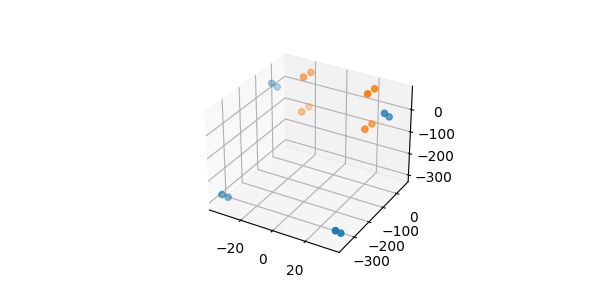

In [84]:
fig =plt.figure()
ax = fig.add_subplot(projection='3d')
pgm.grating.compute_corners()
pgm.mirror.theta = pgm.theta
ax.scatter(pgm.mirror._corners[:,0], pgm.mirror._corners[:,1], pgm.mirror._corners[:,2])
ax.scatter(pgm.grating._corners[:,0],pgm.grating._corners[:,1],pgm.grating._corners[:,2])

In [87]:
print(pgm)

PGM(grating=Grating(line_density=1100.0,
 energy=80.0, 
 cff=2.25, 
 order=1, 
 dimensions=[150.  40.  50.]), mirror=Plane_Mirror(voffset=20.0, 
        hoffset=0.0, 
        axis_voffset=0.0, 
        axis_hoffset=0.0, 
        length=450.0, 
        width=70.0, 
        height=50.0, 
        plane=Plane(point=Point3D(x=-35.0, y=-19.955404424796512, z=1.334853640970333), normal=[ 0.         -0.99777022  0.06674268])))
